## Ejercio de Tarea 02
Véase los datos de [rendimiento de gasolina](https://github.com/HaydeePeruyero/MultivariateStatisticalAnalysis/tree/main/data/Rendimiento_de_gasolina.csv).

**a**. Ajustar un modelo de regresión lineal múltiple que relacione el rendimiento de la gasolina *y*, en millas por galón, la cilindrada del motor ($x_1$) y la cantidad de gargantas del carburador ($x_6$).  

**b**. Formar la tabla de análisis de varianza y probar la significancia de la regresión.  

**c**. Calcular $R^2$ y $R^2_{adj}$ para este modelo. Compararlas con las $R^2$ y $R^2_{adj}$ Ajustado para el modelo de regresión lineal simple, que relaciona las millas con la cilindrada.  

**d**. Determinar un intervalo de confianza para $\beta_1$.  

**e**. Determinar un intervalo de confianza de $95\%$ para el rendimiento promedio de la gasolina, cuando $x_1 = 225 pulg^3$ y $x_6 = 2$ gargantas.  

**f**. Determinar un intervalo de predicción de $95\%$ para una nueva observación de rendimiento de gasolina, cuando $x_1 = 225 pulg^3$ y $x_6 = 2$ gargantas.  

**g**. Considerar el modelo de regresión lineal simple, que relaciona las millas con la cilindrada. Construir un intervalo de confianza de $95\%$ para el rendimiento promedio de la gasolina y un intervalo de predicción para el rendimiento, cuando $x_1 = 225 pulg^3$. Comparar las longitudes de estos intervalos con los intervalos obtenidos en los dos incisos anteriores. ¿Tiene ventajas agregar $x_6$ al modelo?  

**h**. Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?  

**i**. Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.  

**j**. Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?

## 0. Importar 

In [1]:
library(GGally)
library(ggplot2)
library(grid)
library(gridExtra)

Warning message:
"package 'GGally' was built under R version 4.4.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'gridExtra' was built under R version 4.4.3"


In [2]:
DatasetGasolina <- read.csv('./Rendimiento_de_gasolina.csv')

head(DatasetGasolina)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,18.90,350,165,260,8.00,2.56,4,3,200.3,69.9,3910,1
2,17.00,350,170,275,8.50,2.56,4,3,199.6,72.9,3860,1
3,20.00,250,105,185,8.25,2.73,1,3,196.7,72.2,3510,1
4,18.25,351,143,255,8.00,3.00,2,3,199.9,74.0,3890,1
5,20.07,225,95,170,8.40,2.76,1,3,194.1,71.8,3365,0
6,11.20,440,215,330,8.20,2.88,4,3,184.5,69.0,4215,1


## **a**. Modelo de Regresión

Del plot generado, se puede apreciar que los atributos capturan una tendencia o relación con la variable de respuesta. Es decir, se podría decir que a priori $x_1$ (cilindrada del motor) y $x_6$ (cantidad de gargantas del carburador) tienen un impacto sobre $y$ (rendimiento de gasolina); aunque el atributo $x_6$ no tiene una influencia significativa según su valor $t_0$.

In [3]:
# Ajuste de Modelo usando Funciones de R 

LinearModel <- lm('y ~ x1 + x6',DatasetGasolina)

summary(LinearModel)


Call:
lm(formula = "y ~ x1 + x6", data = DatasetGasolina)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0623 -1.6687 -0.3628  1.6221  6.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.884551   1.535408  21.417  < 2e-16 ***
x1          -0.053148   0.006137  -8.660 1.55e-09 ***
x6           0.959223   0.670277   1.431    0.163    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.013 on 29 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7726 
F-statistic: 53.67 on 2 and 29 DF,  p-value: 1.79e-10


In [4]:
#' Función para calcular los valores de los parámetro betas para un modelo lineal.
ManualLinearModel <- function(
    Dataset,
    FeaturesModel,
    TargetLabel
)
{
    DataMatrixX <- as.matrix(cbind(x0=1,Dataset[FeaturesModel]))
    RealValuesY <- as.matrix(Dataset[TargetLabel])
    EstimateBetas <- solve(t(DataMatrixX)%*%DataMatrixX) %*% t(DataMatrixX) %*% RealValuesY

    return(list(
        DataMatrixX = DataMatrixX,
        RealValuesY = RealValuesY,
        EstimateBetas = EstimateBetas
    ))
}

In [5]:
# Ajuste de Modelo de forma Manual

FeaturesModel <- c('x1','x6')
TargetLabel <- 'y'

LinearModelManual <- ManualLinearModel(DatasetGasolina,FeaturesModel,TargetLabel)
DataMatrixX <- LinearModelManual$DataMatrixX
RealValuesY <- LinearModelManual$RealValuesY
EstimateBetas <- LinearModelManual$EstimateBetas

EstimateBetas

,y
x0,32.88455083
x1,-0.05314767
x6,0.95922305


In [6]:
#' Función para generar el plot de dispersión entre los atributos y la variable de respuesta.
PlotScatterReg <- function(
    Dataset,
    FeaturesModel,
    TargetLabel,
    TargetName
)
{
    plot <- ggpairs(
    Dataset[c(FeaturesModel,TargetLabel)],
        title = paste('Relación de Atributos con\n',TargetName),
        lower = list(continuous = wrap('smooth',method='lm',se=FALSE,color='blue')),
        upper = list(continuous = wrap('smooth',method='lm',se=FALSE,color='blue')),
        diag = list(continuous = wrap('barDiag',bins=6,fill='blue'))
    ) + 
    theme_minimal() + 
    theme(
        plot.title = element_text(hjust=0.5,size=18),
        axis.text = element_text(size=10)
    )

    return(plot)
}

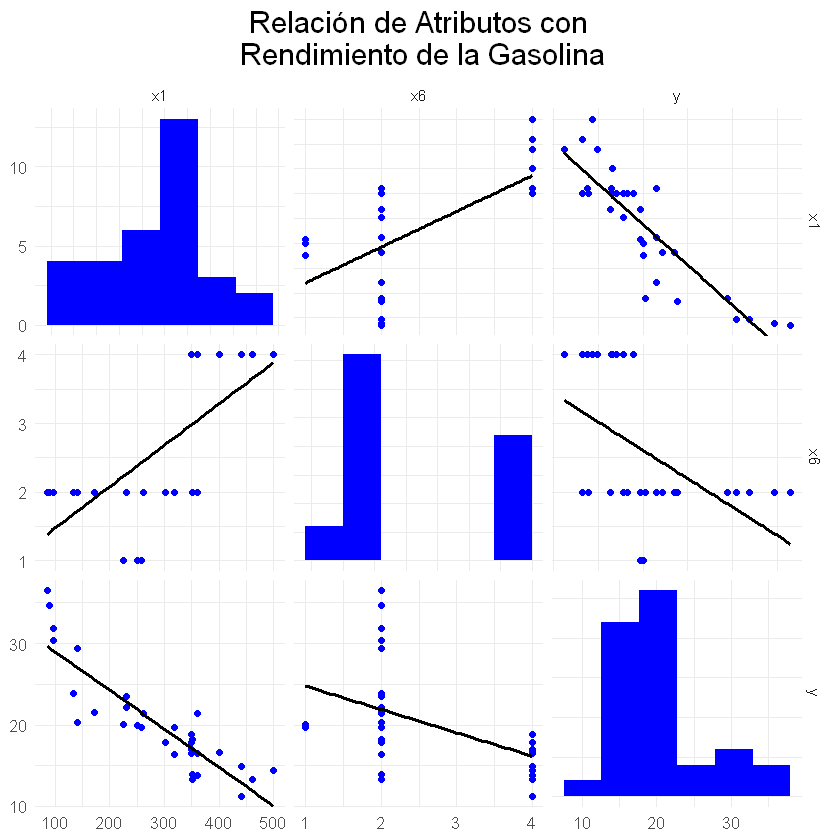

In [7]:
PlotScatterReg(
    DatasetGasolina,
    FeaturesModel,
    TargetLabel,
    'Rendimiento de la Gasolina'
)

## **b**. Tabla de Análisis de Varianza

Considerando los valores obtenidos de la prueba F, se tiene que el valor de $F_0$ es significativamente mayor que el $F_1$, por lo tanto se tiene que el ajuste de regresión es significativa, haciendo que el modulo sea robusto.

In [8]:
#' Función para construir la tabla de ANOVA en base a un modelo de Regresión Lineal, se extraen los valores de interés y son reacomodados en un formato tabular.
ANOVA_Table <- function(
    LinearModel
) 
{
    PartANOVA <- anova(LinearModel)
    Summary <- summary(LinearModel)
  
    SumSquares_Reg <- sum(PartANOVA$`Sum Sq`[1:(nrow(PartANOVA)-1)])
    SumSquares_Res <- PartANOVA$`Sum Sq`[nrow(PartANOVA)]
    SumSquares_Tot <- SumSquares_Reg + SumSquares_Res

    DegreeFreedom_Reg <- sum(PartANOVA$Df[1:(nrow(PartANOVA)-1)])
    DegreeFreedom_Res <- PartANOVA$Df[nrow(PartANOVA)]
    DegreeFreedom_Tot <- DegreeFreedom_Reg + DegreeFreedom_Res

    ANOVATable <- data.frame(
        'Fuente de Variación' = c('Regresión', 'Residuales', 'Total'),
        stringsAsFactors = FALSE
    )
  
    ANOVATable$'Suma de Cuadrados' = c(SumSquares_Reg,SumSquares_Res,SumSquares_Tot)
    ANOVATable$'Grados de Libertad' = c(DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot)
    ANOVATable$'Cuadrados Medios' <- ANOVATable$`Suma de Cuadrados`/ANOVATable$`Grados de Libertad`
    ANOVATable$'F_0' <- c(Summary$fstatistic[1],NA,NA)
  
    return(ANOVATable)
}

#' Función para construir la tabla de ANOVA en base a las observaciones (`DataMatrixX` y `RealValuesY`) y los coeficientes de regresión (`EstimateBetas`), se hacen uso de las formulas matriciales para determinar los diferentes valores de la tabla.
ANOVA_TableManual <- function(
    DataMatrixX,
    RealValuesY,
    EstimateBetas
) 
{
    SizeN <- nrow(DataMatrixX)
    Parameters <- length(EstimateBetas)

    SumSquares_Tot <- as.numeric(t(RealValuesY) %*% RealValuesY - sum(RealValuesY)^2 / SizeN)
    SumSquares_Reg <- as.numeric(t(EstimateBetas) %*% t(DataMatrixX) %*% RealValuesY - sum(RealValuesY)^2 / SizeN)
    SumSquares_Res <- SumSquares_Tot - SumSquares_Reg

    DegreeFreedom_Reg <- Parameters - 1
    DegreeFreedom_Res <- SizeN - Parameters
    DegreeFreedom_Tot <- DegreeFreedom_Reg + DegreeFreedom_Res

    MeanSquares_Reg <- SumSquares_Reg / DegreeFreedom_Reg
    MeanSquares_Res <- SumSquares_Res / DegreeFreedom_Res

    ANOVATable <- data.frame(
        'Fuente de Variación' = c('Regresión', 'Residuales', 'Total'),
        stringsAsFactors = FALSE
    )

    ANOVATable$'Suma de Cuadrados' = c(SumSquares_Reg,SumSquares_Res,SumSquares_Tot)
    ANOVATable$'Grados de Libertad' = c(DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot)
    ANOVATable$'Cuadrados Medios' <- ANOVATable$`Suma de Cuadrados`/ANOVATable$`Grados de Libertad`
    ANOVATable$'F_0' <- c(MeanSquares_Reg/MeanSquares_Res,NA,NA)

    return(ANOVATable)
}

In [9]:
ANOVA_Model = ANOVA_Table(LinearModel)
ANOVA_Model

Fuente.de.Variación,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
<chr>,<dbl>,<int>,<dbl>,<dbl>
Regresión,974.3095,2,487.154770,53.66882
Residuales,263.2345,29,9.077053,NA
Total,1237.5441,31,39.920777,NA


In [10]:
ANOVA_TableManual(
    DataMatrixX,
    RealValuesY,
    EstimateBetas
)

Fuente.de.Variación,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regresión,974.3095,2,487.154770,53.66882
Residuales,263.2345,29,9.077053,NA
Total,1237.5441,31,39.920777,NA


In [11]:
# Calculo del valor estadístico F_1

LevelSignificance <- 0.05
F_1 <- qf(1-LevelSignificance,ANOVA_Model$`Grados de Libertad`[1],ANOVA_Model$`Grados de Libertad`[2])

cat(sprintf('F_1 :: %.4f',F_1))

F_1 :: 3.3277

## **c**. Métricas del Modelo

La métricas del modelo podrían verse bajas, por lo que genera la impresión de que el modelo se ajusta adecuadamente. Pero al momento de ver el plot entre los valores observados contra los estimados, se tiene que existe outliers, estos podrían explicar porque las métricas están degradadas.

In [12]:
# Scores usando el Modelo

cat(sprintf('R^2 :: %.4f\n',summary(LinearModel)$r.squared))
cat(sprintf('R^2 Adjustada :: %.4f\n',summary(LinearModel)$adj.r.squared))

R^2 :: 0.7873
R^2 Adjustada :: 0.7726


In [13]:
#' Función para calcular el puntaje r^2 de forma manual.
ManualRSquared <- function(
    ANOVA
)
{
    SumSquares = ANOVA$`Suma de Cuadrados`
    return(SumSquares[1]/SumSquares[3])
}

#' Función para calcular el puntaje r^2 ajustado de forma manual.
ManualAdjRSquared <- function(
    ANOVA
)
{
    r_squared = ManualRSquared(ANOVA)
    df_tot = ANOVA$`Grados de Libertad`[3]
    df_red = ANOVA$`Grados de Libertad`[2]

    return(1-((1-r_squared)*df_tot)/df_red)
}

In [14]:
# Scores usando Operaciones Manuales

RSquared <- ManualRSquared(ANOVA_Model)
RSquared_Adj <- ManualAdjRSquared(ANOVA_Model)

cat(sprintf('R^2 :: %.4f\n',RSquared))
cat(sprintf('R^2 Adjustada :: %.4f\n',RSquared_Adj))

R^2 :: 0.7873
R^2 Adjustada :: 0.7726


In [15]:
#' Función para plotear los valores esperados y estimados del modelo lineal.
PlotExpectedEstimate <- function(
    LinearModel,
    ExpectedValuesY
) 
{
    plot_data <- data.frame(
        Observados = ExpectedValuesY,
        Estimados = fitted(LinearModel)
    )
  
  # Crear el gráfico con ggplot2
  plot <- ggplot(plot_data, aes(x = Observados, y = Estimados)) +
    geom_point(alpha=0.7,color='blue',size=3) +
    geom_abline(
        intercept = 0, 
        slope = 1, 
        color = 'gray', 
        linetype = 'dotted',
        linewidth = 2
    ) +
    labs(
        title = 'Ajuste del Modelo',
        x = 'Valores Observados',
        y = 'Valores Estimados'
    ) +
    theme_minimal() + 
    theme(
        plot.title = element_text(hjust=0.5,size=18),
        axis.text = element_text(size=12),
        axis.title = element_text(size=14)
    )

    return(plot)
}

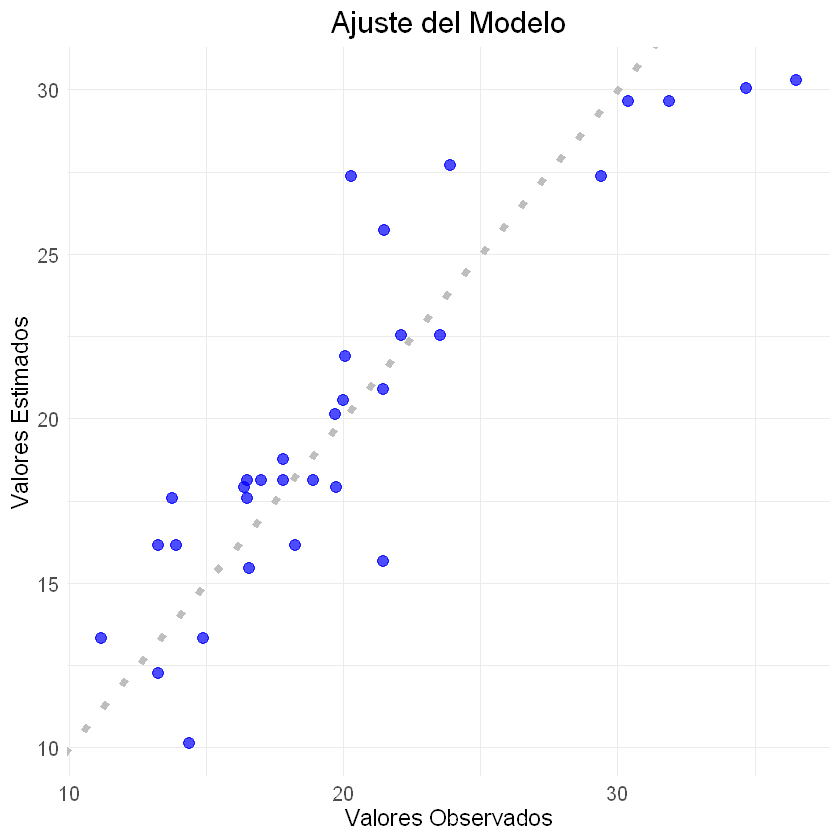

In [16]:
# Plot de los valores esperados (observados) y estimados

PlotExpectedEstimate(LinearModel,DatasetGasolina$y)

## **d**. Intervalo de Confianza para $\beta_1$

La longitud del interval de confianza para $\beta_1$ es pequeño, esto implica que la estimación del coeficiente no tiene incertidumbre, por lo que es una estimación fuerte y robusta.

In [17]:
#' Función para calcular la matriz de covarianza de los parámetros o coeficientes de regresión en base a las observaciones y modelo lineal.
CalculatedCovarianceEstimateBetas <- function(
    LinearModel,
    Dataset,
    FeaturesModel
)
{
    SizeN <- nrow(Dataset)
    DataMatrixX <- as.matrix(cbind(x0=1,Dataset[FeaturesModel]))

    PartANOVA <- anova(LinearModel)
    EstimateSquareSigma <- PartANOVA$`Sum Sq`[nrow(PartANOVA)]/df.residual(LinearModel)

    return(EstimateSquareSigma*solve(t(DataMatrixX)%*%DataMatrixX))
}

#' Función para determinar los intervalos de confianza para los coeficientes de regresión de un modelo.
ConfidenceIntervalsCoefficient <- function(
    LinearModel, 
    Dataset,
    FeaturesModel,
    IndexFeatures,
    LevelSignificance = 0.05
) 
{
    CovarianceEstimateBetas <- CalculatedCovarianceEstimateBetas(LinearModel,Dataset,FeaturesModel) # == vcov(LinearModel)
    
    tValue_1 <- qt(1-LevelSignificance/2,df=LinearModel$df.residual)
    
    for (index_feature in IndexFeatures)
    {
        beta_value <- coef(LinearModel)[index_feature]
        variance_beta <- CovarianceEstimateBetas[index_feature+1,index_feature+1]
        
        interval_borders <- tValue_1 * sqrt(variance_beta)
        left_interval <- beta_value - interval_borders
        right_interval <- beta_value + interval_borders
        
        interval_length <- right_interval - left_interval
        cat(sprintf('%s , %.4f :: [%.4f , %.4f] , Longitud %.4f\n',FeaturesModel[index_feature],beta_value,left_interval,right_interval,interval_length))
    }
}

In [18]:
# Intervalos de Confianza para Coeficientes

ConfidenceIntervalsCoefficient(
    LinearModel,
    DatasetGasolina,
    FeaturesModel,
    c(1)
)

x1 , 32.8846 :: [32.8720 , 32.8971] , Longitud 0.0251


## **e** y **f**. Intervalo de Confianza para Respuesta Media para $x_1 = 225\ pulg^3$ y $x_6 = 2$ gargantas

El intervalo generado es amplio, esto implica que se genera una mayor incertidumbre sobre la estimación para esta observación, por lo que para estos casos el modelo genera estimaciones más imprecisas.

In [19]:
#' Función para determinar los intervalos de confianza para la respuesta/predicción media del modelo.
ConfidenceIntervalsMeanResponse <- function(
    LinearModel,
    Dataset,
    FeaturesModel,
    Observations,
    LevelSignificance = 0.05
) 
{
    CovarianceEstimateBetas <- CalculatedCovarianceEstimateBetas(LinearModel, Dataset, FeaturesModel)
    tValue_1 <- qt(1-LevelSignificance/2,LinearModel$df.residual)
    
    for (index_observation in 1:nrow(Observations)) {
        observation <- Observations[index_observation,]
        actual_values <- as.numeric(observation[FeaturesModel])
        values_x <- matrix(c(1, actual_values),ncol=1)
        prediction <- predict(LinearModel,newdata=observation)
        
        var_prediction <- t(values_x) %*% CovarianceEstimateBetas %*% values_x
        var_prediction <- as.numeric(var_prediction)
        interval_borders <- tValue_1*sqrt(var_prediction)
        
        left_interval <- prediction-interval_borders
        right_interval <- prediction+interval_borders
        cat(sprintf('[%d] :: %.4f <= %.4f <= %.4f , Longitud %.4f\n',index_observation - 1, left_interval, prediction, right_interval, right_interval - left_interval))
    }
}

In [20]:
# Intervalo de confianza para la Respuesta Media

Observations <- data.frame(
    t(c(225,2)),
    stringsAsFactors = FALSE
)
colnames(Observations) <- FeaturesModel

ConfidenceIntervalsMeanResponse(
    LinearModel,
    DatasetGasolina,
    FeaturesModel,
    Observations,
)

[0] :: 21.5765 <= 22.8448 <= 24.1130 , Longitud 2.5365


## **g**. Modelo de Regresión Simple

Considerar el modelo de regresión lineal simple, que relaciona las millas con la cilindrada. Construir un intervalo de confianza de $95\%$ para el rendimiento promedio de la gasolina y un intervalo de predicción para el rendimiento, cuando $x_1 = 225\ pulg^3$. Comparar las longitudes de estos intervalos con los intervalos obtenidos en los dos incisos anteriores. ¿Tiene ventajas agregar $x_6$ al modelo?  

### 1. Modelo

Este modelo simple tiene un mejor puntaje $F_0$ relacionado a la cantidad de grados de liberta pero sus métricas son parecidas. Esto podría deberse a que la variable $x_6$ no tiene un impacto significativo en el modelo anterior.

In [21]:
# Modelo de Regresión Simple

FeaturesModelSimple <- c('x1')
LinearModelSimple <- lm('y ~ x1',DatasetGasolina)

summary(LinearModelSimple)


Call:
lm(formula = "y ~ x1", data = DatasetGasolina)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7923 -1.9752  0.0044  1.7677  6.8171 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.722677   1.443903   23.36  < 2e-16 ***
x1          -0.047360   0.004695  -10.09 3.74e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.065 on 30 degrees of freedom
Multiple R-squared:  0.7723,	Adjusted R-squared:  0.7647 
F-statistic: 101.7 on 1 and 30 DF,  p-value: 3.743e-11


In [22]:
ANOVA_Table(LinearModelSimple)

Fuente.de.Variación,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
<chr>,<dbl>,<int>,<dbl>,<dbl>
Regresión,955.7197,1,955.719710,101.7357
Residuales,281.8244,30,9.394146,NA
Total,1237.5441,31,39.920777,NA


In [23]:
cat(sprintf('R^2 :: %.4f\n',summary(LinearModelSimple)$r.squared))
cat(sprintf('R^2 Adjustada :: %.4f\n',summary(LinearModelSimple)$adj.r.squared))

R^2 :: 0.7723
R^2 Adjustada :: 0.7647


### 2. Intervalo de Confianza

Se genera un intervalo de un tamaño similar respecto al anterior modeo, también se incrementó el valor de la predicción. Esto podría reforzar la idea de que no pueda existir una diferencia significativa entre los modelos.

In [24]:
# Intervalo de confianza para la Respuesta Media

ConfidenceIntervalsMeanResponse(
    LinearModelSimple,
    DatasetGasolina,
    FeaturesModel,
    Observations,
)

[0] :: 21.7784 <= 23.0668 <= 24.3551 , Longitud 2.5767


### 3. Conclusión sobre Agregar $x_6$

Por las métricas e intervalo generados se tiene que el agregar la variable $x_6$ no tiene un impacto significativo sobre las estimaciones generadas por el modelo. Por lo que al realizar la comparativa entre los modelos por medio de una ANOVA se tiene que no hay un diferencia significativa en las predicciones generadas por los modelos.

In [26]:
anova(LinearModelSimple,LinearModel)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,281.8244,NA,NA,NA,NA
2,29,263.2345,1,18.58983,2.048003,0.1630948


## **h**. Gráfica de Probabilidad Normal de los Residuales

En general, los cuantiles de los residuales se alinean con los cuantiles teóricos, es decir, no parece que exista una forma de S en el plot ni que las colas estén pesadas; por lo tanto, no existe un problema aparente en el supuesto de normalidad.

In [41]:
#' Función para plotear los cuartiles de los valores predichos (observados/esperados contra los obtenidos).
PlotQQResiduals <- function(
    LinearModel
)
{
    Residuals <- resid(LinearModel)
    QQData <- qqnorm(Residuals, plot.it = FALSE)
  
    LineFit <- lm(QQData$y ~ QQData$x)
    Intercept <- coef(LineFit)[1]
    Slope <- coef(LineFit)[2]
    
    PlotData <- data.frame(
        Theoretical = QQData$x,
        Residuals = QQData$y
    )
  
    plot <- ggplot(PlotData,aes(x=Theoretical,y=Residuals)) +
        geom_point(alpha=0.7,color='blue',size=3) +
        geom_abline(
            intercept = Intercept,
            slope = Slope,
            color = 'gray',
            linetype = 'dotted',
            linewidth = 1.2
        ) +
        labs(
            x = 'Cuantiles Teóricos',
            y = 'Cuantiles de Residuales',
            title = 'Probabilidad Normal de los Residuales'
        ) +
        theme_minimal() +
        theme(
            plot.title = element_text(size=18,hjust=0.5),
            axis.title = element_text(size=14),
            axis.text = element_text(size=12),
        )
  
  return(plot)
}

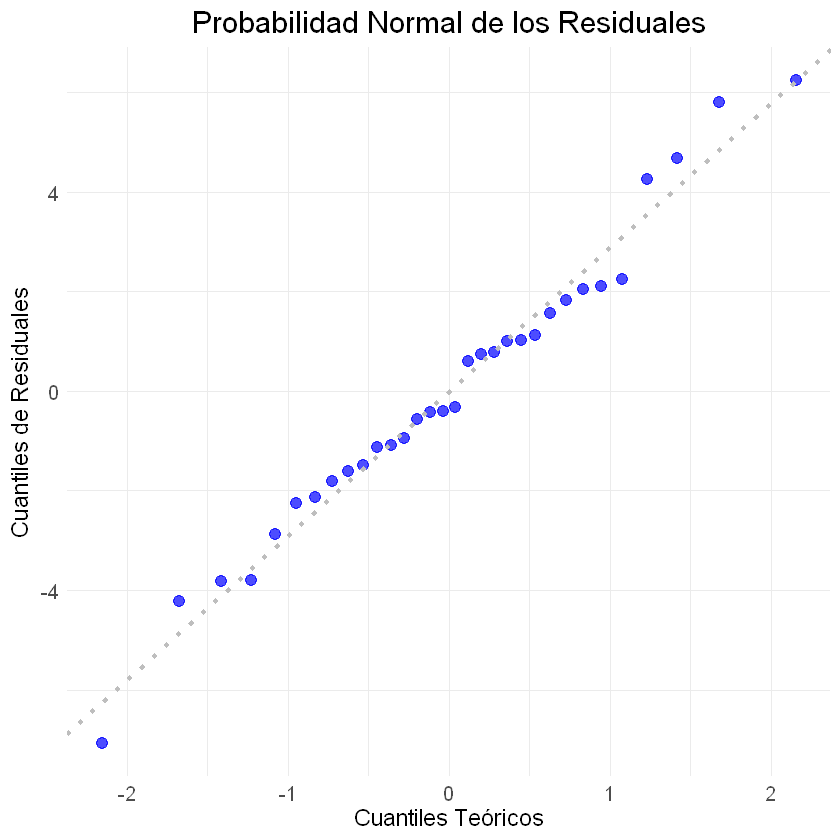

In [42]:
# Plot

PlotQQResiduals(LinearModel)

## **i**. Gráfica de los Residuales en Función de la Respuesta Predicha

Aunque parece que forma un patrón aleatorio los residuales, se tiene que en los valores extremos se encuentran más dispersos, esto podría estar relacionado con la existencia de outliers y de una heterocedasticidad en los datos.

In [31]:
PlotPredictResiduals <- function(
    LinearModel,
    TargetName
)
{
    PlotData <- data.frame(
        Fitted = fitted(LinearModel),
        Residuals = residuals(LinearModel)
    )
  

    plot <- ggplot(PlotData,aes(x=Fitted,y=Residuals)) +
        geom_point(alpha=0.7,color='blue',size=3) +
        labs(
            title = 'Residuales en Función de la Respuesta Predicha',
            x = TargetName,
            y = 'Residual'
        ) +
        theme_minimal() +
        theme(
            plot.title = element_text(hjust=0.5,size=18),
            axis.text = element_text(size=12),
            axis.title = element_text(size=14)
        )
  
    return(plot)
}

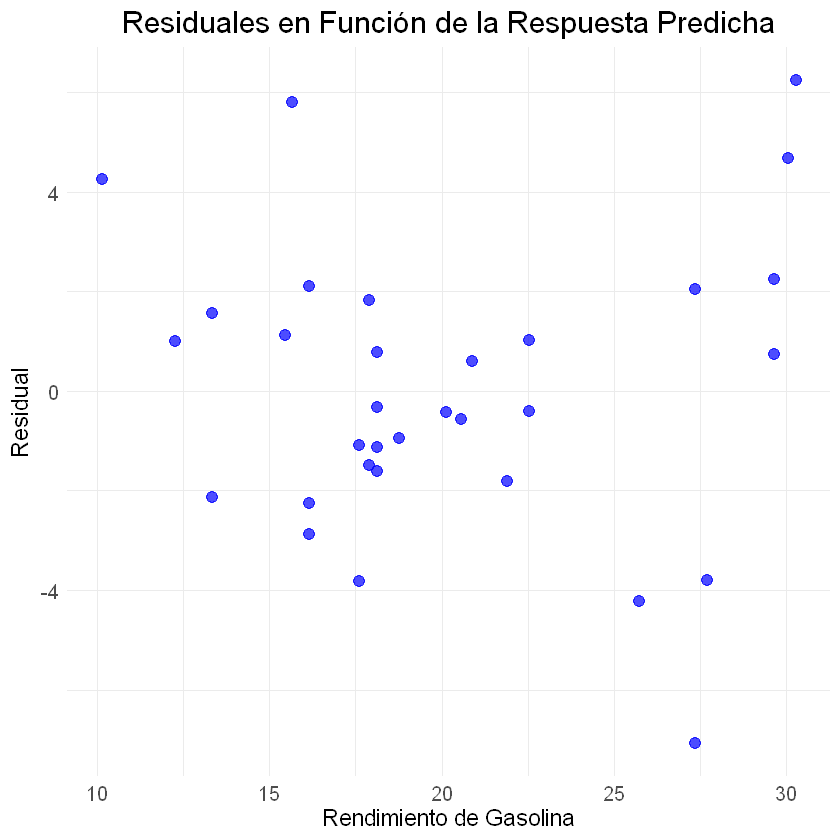

In [32]:
# Plot

PlotPredictResiduals(LinearModel,'Rendimiento de Gasolina')

## **j**. Gráficas de los Residuales en Función de las Variables Regresoras

Los residuales en la variable $x_1$ no parecen seguir un patrón, por lo que se tiene que esta variable no viola el supuesto de especificación en el modelo. En cambio, en la variable $x_6$ se tiene un clara heterocedasticidad, por lo que esta variable hace que no se cumpla el supuesto de especificación en el modelo.

In [36]:
#' Función para plotear los residuales en función de las variables del modelo.
PlotVariableResiduals <- function(
    LinearModel,
    Dataset,
    FeaturesModel
)
{
    ResidValues <- resid(LinearModel)
    
    PlotList <- list()
    
    for (feature in FeaturesModel) 
    {
        PlotData <- data.frame(x=Dataset[[feature]],y=ResidValues)
        
        plot <- ggplot(PlotData, aes(x=x,y=y)) +
            geom_point(alpha=0.6,color='blue',size=2.5) +
            labs(x=feature,y='Residuales') +
            theme_minimal() +
            theme(
                plot.margin = unit(c(1, 1, 1, 1),'lines'),
                axis.text = element_text(size=10),
                axis.title = element_text(size=12),
            )
        
        PlotList[[feature]] <- plot
    }
    
    grid.arrange(
        grobs = PlotList,
        nrow = 2,
        top = textGrob(
            'Residuales en Función de las Variables Regresoras',
            gp = gpar(fontsize=15)
        )
    )
}

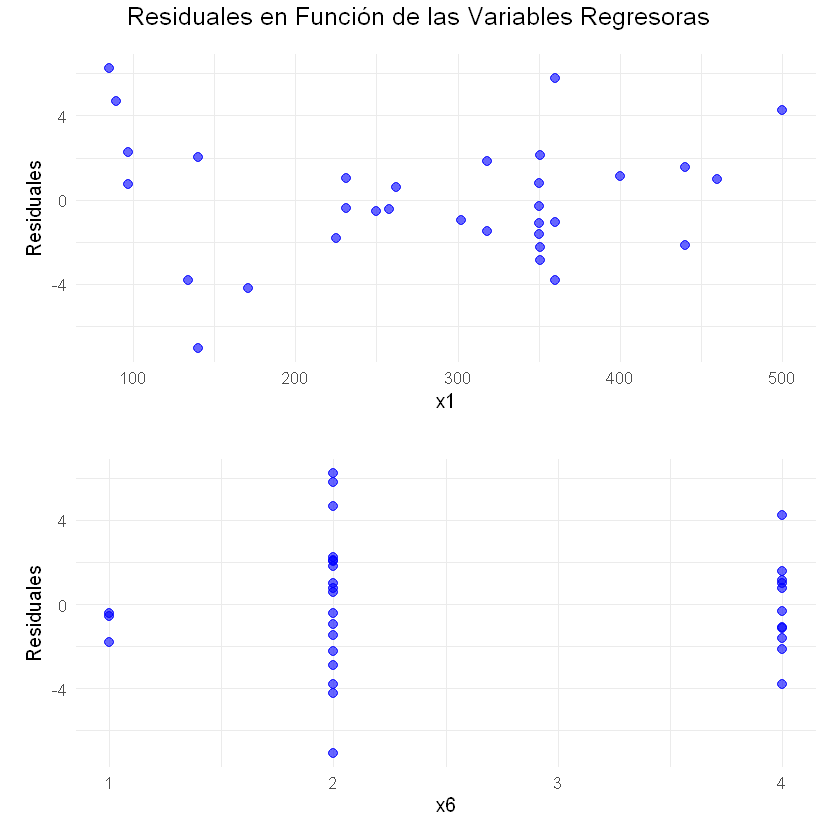

In [37]:
# Plot

PlotVariableResiduals(
    LinearModel,
    DatasetGasolina,
    FeaturesModel
)